# Bach Figured bass analysis

## Done
- Got a countvectorized representation

## TO DO:
- The countvectorized_data includes only n-grams of figuration. Next, combine figuration and bass movement counted in half-step (e.g. +2, -1, etc...)

In [179]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
import seaborn as sns

In [239]:

def import_and_clean(filename):
    part_types = pd.read_csv(filename, 
                     skiprows=3, sep='\t',nrows=0)
    df = pd.read_csv(filename, 
                     skiprows=13, names=['fb'],
                     sep='\t', usecols = np.argwhere(part_types.columns=='**fb').flatten(),
                     )
    # Drop rows corresponding to bar number or where the harmony doesn't change
    df.drop(index=np.argwhere(df.loc[:,'fb'].str.contains('=').values).flatten(),inplace=True)
    df.reset_index(inplace=True,drop=True)
    df.drop(index=df.index[-2:], inplace=True)
    df.drop(index=np.argwhere(df.loc[:,'fb'].str.contains('\\.').values).flatten(),inplace=True)
    df.reset_index(inplace=True,drop=True)
#     df.head()
    
#     df['fb'] = [f'*{s}*' for s in df['fb']]
    # convert to a string
    A = list(df['fb'].values)
    string = ''
    for i, s in enumerate(A):
        if i>0:
            string += ' '
        string += f"!{s}!"
    return string

In [240]:
basefolder = "../Data/Music/Figured_bass/Bach_chorale_FB-master/FB_source/translated_kern/"
string_dict = {}
for file in listdir(basefolder):
    if file[-4:] == '.krn':
        string_dict[file[:-15]] = import_and_clean(basefolder + file)

df = pd.DataFrame.from_dict(string_dict,orient='index',columns=['fb'])
df.head()

,fb
BWV_13.06_,!6! !6! !6! !6 5! !6! !7! !nr6! !5! !5_! !5! !...
BWV_174.05_,!5! !6! !6! !5! !6 5! !4! !3! !9! !6! !5! !#6\...
BWV_251_,!6! !6! !7! !5! !6! !nr6! !6 nr5! !4! !3! !6! ...
BWV_244.32_,!5! !6! !5! !6! !6! !4! !3! !6 4 2! !6 4 2! !6...
BWV_248.42_,!6!


# TfIdf

In [249]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b[\w\\\ # - |]+\b")
vectorizer = TfidfVectorizer(token_pattern=r"![^!]+!")

# vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b.+\b")
vectorized_data = vectorizer.fit_transform(df['fb'])

print(vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names(),index=df.index)

tfidf_df.head()

['! !', '!# 7!', '!#!', '!#2\\!', '!#2| 4!', '!#2|!', '!#4| 2!', '!#4| 6!', '!#4|!', '!#5\\ #!', '!#5\\ 4!', '!#5\\!', '!#5| #!', '!#5| 4 9!', '!#5| 4!', '!#5| 9 3!', '!#5|!', '!#6\\ #4| 2!', '!#6\\ #4| 3!', '!#6\\ -r5!', '!#6\\ 4 3!', '!#6\\ 4!', '!#6\\ 5!', '!#6\\ n!', '!#6\\ nr5!', '!#6\\!', '!#7\\ 2!', '!#7\\ 4 2!', '!#7\\ 4!', '!#7\\ 5!', '!#7\\!', '!#7| 5 4!', '!#7| 7!', '!#7|!', '!#_!', '!#r5!', '!#r6 #4| 2!', '!#r6 5!', '!#r7!', '!*!', '!-!', '!-r4!', '!-r5!', '!-r6 4 -r2!', '!-r6 4 2!', '!-r6 4!', '!-r6!', '!-r7 3!', '!-r7 5!', '!-r7!', '!2 #4| 6!', '!2 -5/!', '!2 4!', '!2 nr4 6!', '!2!', '!3 5 7!', '!3 5!', '!3 6 #4|!', '!3 6!', '!3 7!', '!3 8!', '!3!', '!4 #2\\!', '!4 #2|!', '!4 #5| 9!', '!4 #7| 5!', '!4 2 5!', '!4 2!', '!4 5 2!', '!4 5!', '!4 6 2!', '!4 6 8!', '!4 6!', '!4 7!', '!4 9 #7\\!', '!4 9!', '!4!', '!5 !', '!5 #!', '!5 #2|!', '!5 #6\\!', '!5 -!', '!5 -r4 2!', '!5 2!', '!5 3 7!', '!5 3!', '!5 4 #2|!', '!5 4 -r2!', '!5 4 2!', '!5 4!', '!5 6!', '!5 7!', '!5 8!', '!5 n

,! !,!# 7!,!#!,!#2\!,!#2| 4!,!#2|!,!#4| 2!,!#4| 6!,!#4|!,!#5\ #!,...,!nr5!,!nr6 #4| 3!,!nr6 4 2!,!nr6 4 3!,!nr6 5!,!nr6!,!nr7 #!,!nr7 4 2!,!nr7 5!,!nr7!
BWV_13.06_,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.148579,0.0,0.0,0.0,0.0
BWV_174.05_,0.0,0.0,0.109646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099416,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
BWV_251_,0.0,0.0,0.224405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.115714,0.0,0.0,0.0,0.0
BWV_244.32_,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.134735,0.0,0.0,0.0,0.0
BWV_248.42_,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


,2,2 #4| 6,2 4,2 nr4 6,2| 4,3,3 5,3 5 7,3 6,3 6 #4,...,r4 2,r5,r6,r6 #4| 2,r6 4,r6 4 2,r6 5,r7,r7 3,r7 5
BWV_13.06_,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BWV_174.05_,0.0,0.0,0.0,0.0,0.0,0.143147,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BWV_251_,0.0,0.0,0.0,0.0,0.0,0.078769,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BWV_244.32_,0.0,0.0,0.0,0.0,0.0,0.089964,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BWV_248.42_,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
# Generate n-grams

In [260]:
from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(token_pattern=r"(?u)\b[\w\\\ # - |]+\b", 
#                              ngram_range=(2,2),
#                             min_df=3)
vectorizer = CountVectorizer(token_pattern=r"![^!]+!", 
                             ngram_range=(2,2),
                            min_df=10)
vectorized_data = vectorizer.fit_transform(df['fb'])
countvec_df = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names(),
                           index=df.index)
countvec_df.head()

,!#! !#!,!#! !5!,!#! !6 5!,!#! !6!,!#! !7!,!#6\! !#!,!#6\! !6!,!3! !6 5!,!3! !6!,!4! !#!,...,!7! !5!,!7! !6 5!,!7! !6!,!7! !7!,!8 #! !7!,!8! !6 5!,!8! !7!,!9! !6!,!9! !8!,!n! !6!
BWV_13.06_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
BWV_174.05_,0,1,0,2,0,1,0,0,0,0,...,2,0,2,0,0,0,1,1,0,0
BWV_251_,0,0,0,2,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
BWV_244.32_,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
BWV_248.42_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


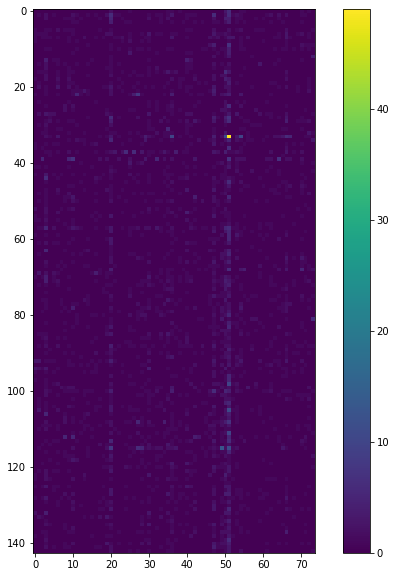

In [261]:
fig = plt.figure(figsize=[10,10])
plt.imshow(countvec_df)
plt.colorbar()

# Find the most common n-grams

<AxesSubplot:xlabel='0', ylabel='index'>

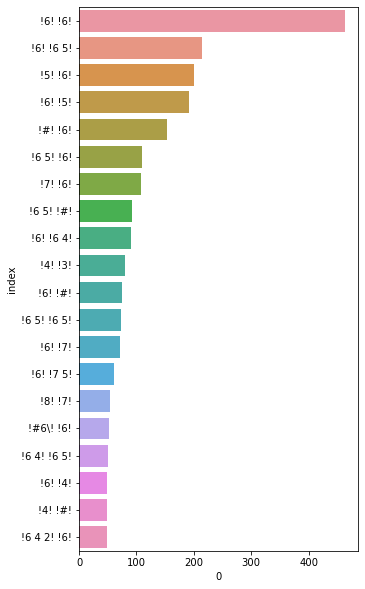

In [265]:
figure = plt.figure(figsize=[5,10])
temp = countvec_df.sum(axis=0).sort_values(ascending=False)[:20].reset_index()
temp
sns.barplot(data=temp,y='index',x=0)
# sns.countplot(data=temp)

In [211]:
temp.head()

,index,0
0,6 6,620
1,5 6,265
2,6 6 5,233
3,6 5,217
4,6 5 6,160


In [217]:
countvec_df.columns

Index(['2 3', '2 6', '3 2', '3 4', '3 5', '3 5 2', '3 6', '3 6 4 2', '3 6 5',
       '3 7',
       ...
       'nr6 5', 'nr6 6', 'nr6 6 4 2', 'nr6 7 nr5', 'nr7 5', 'nr7 6', 'r5 5',
       'r5 6', 'r7 5 6 5', 'r7 6'],
      dtype='object', length=194)

In [218]:
vectorizer.get_feature_names()

['2 3',
 '2 6',
 '3 2',
 '3 4',
 '3 5',
 '3 5 2',
 '3 6',
 '3 6 4 2',
 '3 6 5',
 '3 7',
 '3 7 4 2',
 '3 9',
 '4 2 6',
 '4 3',
 '4 5',
 '4 5 4',
 '4 6',
 '4 6 5',
 '4 n',
 '4| 2 6',
 '5 2 6',
 '5 3 4 2',
 '5 3 5',
 '5 3 6',
 '5 3 6 4',
 '5 3 6 4 2',
 '5 3 6 5',
 '5 3 7 5',
 '5 3 8',
 '5 4',
 '5 4 2',
 '5 4 2 6',
 '5 4 2 9',
 '5 4 3',
 '5 4 6',
 '5 4 n',
 '5 4| 2',
 '5 5',
 '5 5 3',
 '5 6',
 '5 6 #4',
 '5 6 #4| 2',
 '5 6 3',
 '5 6 4',
 '5 6 4 2',
 '5 6 5',
 '5 6 5 n',
 '5 6 8',
 '5 7',
 '5 7 4 2',
 '5 7 5',
 '5 8',
 '5 9',
 '5 n',
 '5 n 6',
 '5 nr6',
 '6 #4 6',
 '6 #4| 2 6',
 '6 #4| 2 7',
 '6 #4| 2 7 4 2',
 '6 3',
 '6 3 4',
 '6 3 5',
 '6 4',
 '6 4 2',
 '6 4 2 5',
 '6 4 2 6',
 '6 4 2 6 4 2',
 '6 4 2 6 5',
 '6 4 2 7',
 '6 4 2 7 4 2',
 '6 4 3',
 '6 4 3 6',
 '6 4 5',
 '6 4 5 3',
 '6 4 5 4',
 '6 4 5 n',
 '6 4 6',
 '6 4 6 4',
 '6 4 6 5',
 '6 4 7 5',
 '6 4| 2',
 '6 5',
 '6 5 2',
 '6 5 3',
 '6 5 4',
 '6 5 4 2',
 '6 5 5',
 '6 5 5 4',
 '6 5 6',
 '6 5 6 #4| 2',
 '6 5 6 4',
 '6 5 6 4 2',
 '6 5 6 5',